## 1.- Importar librerías

In [45]:
import os, glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
os.listdir()
"vamo"

'vamo'

## 2.- Obtener archivos

In [47]:
files_total_ent = glob.glob('agrupados/total_estatal/*.csv')
files_total_mun = glob.glob('agrupados/total_mun/*.csv')
files_fuentes_ent = glob.glob('agrupados/fuentes_gral/*_ent/*.csv')
files_fuentes_mun = glob.glob('agrupados/fuentes_gral/*_mun/*.csv')
file_fuentes_ent = glob.glob('agrupados/fuentes_gral/*.csv')
file_fuentes_ent

['agrupados/fuentes_gral\\INEM-2005-Fuente-entidades.csv']

In [48]:
renameCols = {
    "Entidad Fed.":"nom_ent",
    "ESTADO":"nom_ent",
    "ESTADO":"nom_ent",
    "cve.edo.":"cve_ent",
    "cvemun":"cve_mun",
    "cveedo":"cve_ent",
    "cveestado":"cve_ent",
    "cvemunicipio":"cve_mun",
    "estado":"nom_ent",
    "cvedeestado":"cve_ent",
    "municipio":"nom_mun",
    "cvedemunicipio":"cve_mun",
    "pm25":"pm2.5",
    "año":"year",
    "Añño":"year",
    "entidadfed.":"nom_ent",
    'municipioodeleg.': 'nom_mun',
}

emisiones = ['pm10', 'pm2.5',  'co', 'nox', 'cov', 'nh3','so2']

In [54]:
estados_rename = {
  'Coahuila De Zaragoza': 'Coahuila',
  'Michoacan De Ocampo': 'Michoacán',
  'Michoacán De Ocampo': 'Michoacán',
  'Michoacan':'Michoacán',
  'Mexico': 'México',
  'Nuevo Leon': 'Nuevo León',
  'Queretaro Arteaga': 'Querétaro',
  'Queretaro': 'Querétaro',
  'San Luis Potosi':'San Luis Potosí',
  'Veracruz De Ignacio De La Llave': 'Veracruz',
  'Yucatan': 'Yucatán',
  'Distrito Federal': 'Ciudad de México',
  'Ciudad De México': 'Ciudad de México',
}

estados = [
  'Aguascalientes',
  'Baja California',
  'Baja California Sur',
  'Campeche',
  'Chiapas',
  'Chihuahua',
  'Ciudad de México',
  'Coahuila',
  'Colima',
  'Durango',
  'Guanajuato',
  'Guerrero',
  'Hidalgo',
  'Jalisco',
  'Michoacán',
  'Morelos',
  'México',
  'Nayarit',
  'Nuevo León',
  'Oaxaca',
  'Puebla',
  'Querétaro',
  'Quintana Roo',
  'San Luis Potosí',
  'Sinaloa',
  'Sonora',
  'Tabasco',
  'Tamaulipas',
  'Tlaxcala',
  'Veracruz',
  'Yucatán',
  'Zacatecas'
]


len(estados)

32

In [49]:
def readAppendSectoresFiles(files):
  df = pd.DataFrame()
  
  for f in files:
    
    try:
      dfi = pd.read_csv(f)
      
    except UnicodeDecodeError:
      dfi = pd.read_csv(f, encoding="latin1") 
      
    fuente = f.split("-")[3]
    year = f.split("-")[1]
    dfi["fuente"] = fuente
    dfi["year"] = year
    
    ## remove empty spaces in column names
    dfi.columns = dfi.columns.str.replace(" ", "")
    
    ## lowercase column names
    dfi.columns = dfi.columns.str.lower()
    
    dfi.rename(columns=renameCols, inplace=True)
    df = pd.concat([df, dfi])
    
    
  # make columns emisiones to float64
  for e in ['pm10', 'pm2.5', 'so2', 'co', 'nox', 'cov', 'nh3']:
    #dfi[e] = dfi[e].str.replace(",", "")
    df[e] = df[e].astype("float64")
    
    
  return df

#colStateTotal = ['nom_ent', 'year', 'pm10', 'pm2.5', 'so2', 'co', 'nox', 'cov', 'nh3']
def readAppendTotalFiles(files):
  df = pd.DataFrame()

  for f in files:
    
    year = f.split("-")[1]
    tipo = f.split("-")[-1]
    
    try:
      
      dfi = pd.read_csv(f)
      
    except:
      
      dfi = pd.read_csv(f, encoding="latin1") 
      
    # keep only first 32 rows
    #dfi = dfi.iloc[:32]
       
    # if year = "2005", remove "Municipio" column
    if year == "2005" and tipo ==  "municipal.csv":
      dfi.drop(columns=["Municipio"], inplace=True)   
    
    ## remove empty spaces in column names
    dfi.columns = dfi.columns.str.replace(" ", "")
    
    ## lowercase column names
    dfi.columns = dfi.columns.str.lower()
    dfi.rename(columns=renameCols, inplace=True)
  
    dfi["year"] = year
    

    
 
    for e in ['pm10', 'pm2.5','so2', 'co', 'nox', 'cov', 'nh3']:
      # check if column is type string
      if dfi[e].dtype != "object":
        continue
      
      # remove "," in values
      dfi[e] = dfi[e].str.replace(",", "")
        
      dfi[e] = dfi[e].astype("float64")

    #dfi = dfi[colStateTotal]
    df = pd.concat([df, dfi])
    
  return df



## Fuentes estatal municipal

In [50]:
fuentes_entidad_2005 = pd.read_csv(file_fuentes_ent[0])
## remove empty spaces in column names
fuentes_entidad_2005.columns = fuentes_entidad_2005.columns.str.replace(" ", "")
    
## lowercase column names
fuentes_entidad_2005.columns = fuentes_entidad_2005.columns.str.lower()
fuentes_entidad_2005.rename(columns=renameCols, inplace=True)
# make columns emisiones to float64
for e in ['pm10', 'pm2.5', 'so2', 'co', 'nox', 'cov', 'nh3']:
  fuentes_entidad_2005[e] = fuentes_entidad_2005[e].str.replace(",", "")
  fuentes_entidad_2005[e] = fuentes_entidad_2005[e].astype("float64")
  
fuentes_entidad_2005.head()

,year,fuente,cve_ent,nom_ent,pm10,pm2.5,so2,co,nox,cov,nh3
0,2005,AREA,1.0,AGUASCALIENTES,4159.26,2921.86,4184.56,20816.05,3477.93,19337.84,20899.68
1,2005,AREA,2.0,BAJA CALIFORNIA,11663.15,8612.71,16784.09,75208.42,12350.39,52375.69,12162.86
2,2005,AREA,3.0,BAJA CALIFORNIA SUR,4024.20,3034.90,1793.27,22071.83,2698.27,11472.82,3215.62
3,2005,AREA,4.0,CAMPECHE,6654.25,4873.10,1992.62,36258.78,3559.64,15777.77,10900.75
4,2005,AREA,5.0,COAHUILA,9489.41,6094.22,13293.27,38034.03,12457.83,46581.64,18073.55


In [58]:
fuentes_ent = readAppendSectoresFiles(files_fuentes_ent)
fuentes_ent = pd.concat([ fuentes_entidad_2005, fuentes_ent])
fuentes_ent = pd.melt(fuentes_ent, id_vars=["nom_ent", "cve_ent", "fuente", "year"], value_vars=emisiones, var_name="emision", value_name="emisiones")
fuentes_ent["nom_ent"] = fuentes_ent["nom_ent"].str.title()
fuentes_ent["nom_ent"] = fuentes_ent["nom_ent"].replace(estados_rename)

# keep only states in estados list
fuentes_ent = fuentes_ent[fuentes_ent["nom_ent"].isin(estados)]



fuentes_mun = readAppendSectoresFiles(files_fuentes_mun)
fuentes_mun = pd.melt(fuentes_mun, id_vars=["nom_ent", "cve_ent", "nom_mun", "cve_mun", "fuente", "year"], value_vars=emisiones, var_name="emision", value_name="emisiones")
fuentes_mun["nom_ent"] = fuentes_mun["nom_ent"].str.title()
fuentes_mun["nom_ent"] = fuentes_mun["nom_ent"].replace(estados_rename)

# keep only states in estados list
fuentes_mun = fuentes_mun[fuentes_mun["nom_ent"].isin(estados)]

fuentes_ent.head()

,nom_ent,cve_ent,fuente,year,emision,emisiones
0,Aguascalientes,1.0,AREA,2005,pm10,4159.26
1,Baja California,2.0,AREA,2005,pm10,11663.15
2,Baja California Sur,3.0,AREA,2005,pm10,4024.20
3,Campeche,4.0,AREA,2005,pm10,6654.25
4,Coahuila,5.0,AREA,2005,pm10,9489.41


In [59]:
fuentes_mun.head()

,nom_ent,cve_ent,nom_mun,cve_mun,fuente,year,emision,emisiones
0,Aguascalientes,1,Aguascalientes,1.0,area,2008,pm10,1154.287483
1,Aguascalientes,1,Asientos,2.0,area,2008,pm10,261.230143
2,Aguascalientes,1,Calvillo,3.0,area,2008,pm10,268.989001
3,Aguascalientes,1,Cosio,4.0,area,2008,pm10,92.818156
4,Aguascalientes,1,Jesus Maria,5.0,area,2008,pm10,431.452577


## Total estatal municipal

In [53]:
files_total_ent

['agrupados/total_estatal\\INEM-2005-Total-estatal.csv',
 'agrupados/total_estatal\\INEM-2008-Total-estatal.csv',
 'agrupados/total_estatal\\INEM-2013-Total-estatal.csv',
 'agrupados/total_estatal\\INEM-2016-Total-estatal.csv']

In [56]:
total_ent = readAppendTotalFiles(files_total_ent)
total_ent = pd.melt(total_ent, id_vars=["nom_ent",  "year"], value_vars=emisiones, var_name="emision", value_name="emisiones")
# make nom_ent to title
total_ent["nom_ent"] = total_ent["nom_ent"].str.title()
total_ent["nom_ent"] = total_ent["nom_ent"].replace(estados_rename)

# keep only states in estados list
total_ent = total_ent[total_ent["nom_ent"].isin(estados)]

total_mun = readAppendTotalFiles(files_total_mun)
print(total_mun.columns)
total_mun = pd.melt(total_mun, id_vars=["nom_ent", "nom_mun", "year"], value_vars=emisiones, var_name="emision", value_name="emisiones")
total_mun["nom_ent"] = total_mun["nom_ent"].str.title()
total_mun["nom_ent"] = total_mun["nom_ent"].replace(estados_rename)
# keep only states in estados list
total_mun = total_mun[total_mun["nom_ent"].isin(estados)]

total_mun

Index(['year', 'cve_ent', 'nom_ent', 'nom_mun', 'pm10', 'pm2.5', 'so2', 'co',
       'nox', 'cov', 'nh3', 'cve_mun'],
      dtype='object')


,nom_ent,nom_mun,year,emision,emisiones
0,Aguascalientes,Aguascalientes,2005,pm10,1989.630000
1,Aguascalientes,Asientos,2005,pm10,356.040000
2,Aguascalientes,Calvillo,2005,pm10,302.590000
3,Aguascalientes,Cosío,2005,pm10,117.070000
4,Aguascalientes,Jesús María,2005,pm10,768.540000
...,...,...,...,...,...
68851,Zacatecas,Villa Hidalgo,2016,so2,6.905418
68852,Zacatecas,Villanueva,2016,so2,36.795375
68853,Zacatecas,Zacatecas,2016,so2,166.354152
68854,Zacatecas,Trancoso,2016,so2,7.043843


## Graficos

### Fuentes estatal municipal

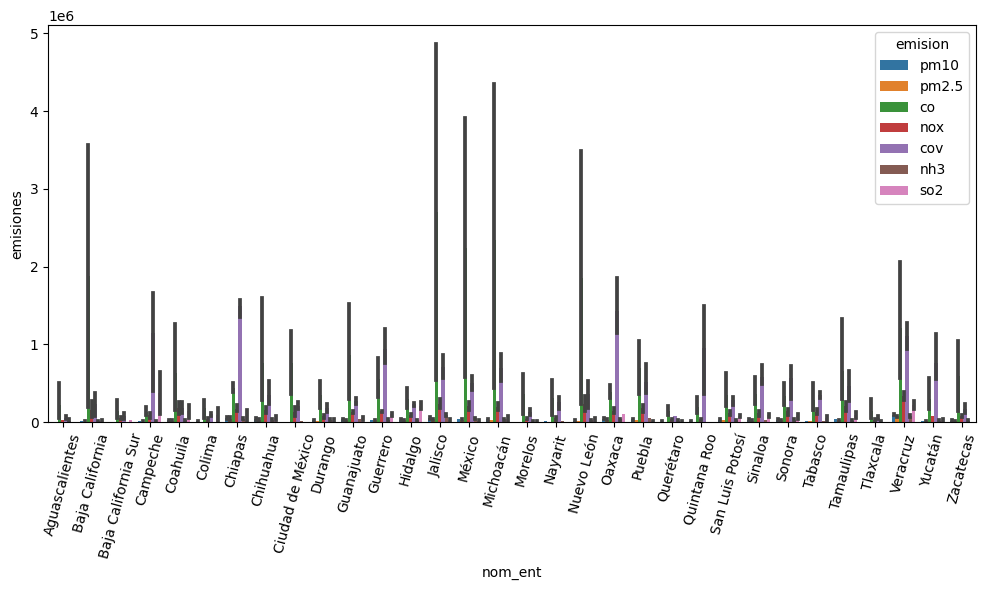

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x="nom_ent", y="emisiones", hue="emision", data=total_ent, ax=ax)

# rotate xtikcs 75 degrees
plt.xticks(rotation=75)

plt.tight_layout()
plt.show()